<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

In [1]:
# import libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [3]:
# read data and check how many class in train set

In [4]:
pwd

'/Users/sena/Desktop/Proje'

In [5]:
data_dir = '/Users/sena/Desktop/Proje/data'

In [6]:
os.listdir(data_dir)

['.DS_Store', 'test', 'train', 'validation']

In [7]:
validation_path = data_dir+'/validation'

In [8]:
test_path = data_dir+'/test'

In [9]:
train_path = data_dir+'/train'

In [10]:
os.listdir(train_path)

['cat', 'dog']

In [11]:
os.listdir(test_path)

['6400.jpg',
 '4217.jpg',
 '3578.jpg',
 '10321.jpg',
 '5109.jpg',
 '11981.jpg',
 '10447.jpg',
 '11759.jpg',
 '4571.jpg',
 '7078.jpg',
 '12250.jpg',
 '6366.jpg',
 '12244.jpg',
 '6372.jpg',
 '11995.jpg',
 '10453.jpg',
 '4565.jpg',
 '4203.jpg',
 '10335.jpg',
 '6414.jpg',
 '2882.jpg',
 '3544.jpg',
 '11003.jpg',
 '5135.jpg',
 '7044.jpg',
 '5653.jpg',
 '3222.jpg',
 '11765.jpg',
 '5647.jpg',
 '3236.jpg',
 '11771.jpg',
 '4559.jpg',
 '7050.jpg',
 '12278.jpg',
 '6428.jpg',
 '2896.jpg',
 '3550.jpg',
 '11017.jpg',
 '10309.jpg',
 '5121.jpg',
 '12293.jpg',
 '5874.jpg',
 '11942.jpg',
 '10484.jpg',
 '5860.jpg',
 '11956.jpg',
 '10490.jpg',
 '12287.jpg',
 '2869.jpg',
 '2841.jpg',
 '3587.jpg',
 '5848.jpg',
 '5690.jpg',
 '6399.jpg',
 '7087.jpg',
 '7093.jpg',
 '5684.jpg',
 '2855.jpg',
 '3593.jpg',
 '6164.jpg',
 '12052.jpg',
 '4773.jpg',
 '10645.jpg',
 '10123.jpg',
 '4015.jpg',
 '6602.jpg',
 '6616.jpg',
 '10137.jpg',
 '11229.jpg',
 '4001.jpg',
 '10889.jpg',
 '4767.jpg',
 '3008.jpg',
 '10651.jpg',
 '5479.jpg

In [12]:
len(os.listdir(test_path))

6897

**Let's check how many images there are.**

In [13]:
len(os.listdir(train_path+'/cat'))

12500

In [14]:
#number of cat images in train set

In [15]:
len(os.listdir(train_path+'/dog'))

5026

In [16]:
#number of dog images in train set

In [17]:
#take cat image at index 0 from train set
#take dog image at index 1 from train set
#compare their shapes


In [18]:
os.listdir(train_path+'/cat')[0]

'cat.5077.jpg'

In [19]:
cat_path = train_path+'/cat'+'/cat.5077.jpg'

In [20]:
cat_image= imread(cat_path)

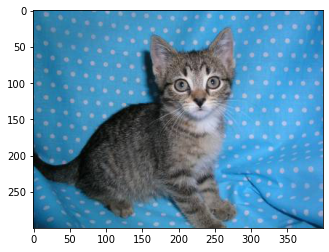

In [21]:
plt.imshow(cat_image)

In [22]:
os.listdir(train_path+'/dog')[0]

'dog.1753.jpg'

In [23]:
dog_path = train_path+'/dog'+'/dog.1753.jpg'

In [24]:
imread(dog_path)

array([[[251, 219, 234],
        [250, 218, 233],
        [249, 217, 230],
        ...,
        [ 94,  70,  66],
        [106,  82,  78],
        [ 99,  75,  71]],

       [[251, 219, 234],
        [250, 218, 233],
        [249, 217, 230],
        ...,
        [ 97,  73,  69],
        [108,  84,  80],
        [103,  79,  75]],

       [[249, 218, 233],
        [248, 218, 230],
        [247, 217, 229],
        ...,
        [ 97,  76,  71],
        [109,  88,  83],
        [105,  84,  79]],

       ...,

       [[145,  52, 141],
        [141,  51, 139],
        [139,  49, 137],
        ...,
        [151, 135, 138],
        [155, 139, 142],
        [148, 132, 135]],

       [[146,  53, 142],
        [141,  51, 139],
        [137,  47, 135],
        ...,
        [151, 135, 138],
        [157, 141, 144],
        [149, 133, 136]],

       [[145,  52, 141],
        [140,  50, 138],
        [137,  47, 135],
        ...,
        [155, 139, 142],
        [164, 148, 151],
        [148, 132, 135]]

In [25]:
dog_image = imread(dog_path)

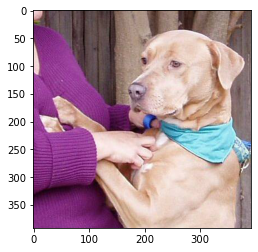

In [26]:
plt.imshow(dog_image)

In [27]:
#show cat image

In [28]:
#show dog image

**Let's decide on the final dimension of these images.**

In [29]:
imread(dog_path).shape

(392, 393, 3)

In [30]:
x = []
y = []

In [31]:
for img in os.listdir(train_path+'/dog'):
    a,b,_ = imread(train_path+'/dog'+'/'+img).shape
    x.append(a)
    y.append(b)

In [32]:
np.mean(x)

365.0505372065261

In [33]:
np.mean(y)

398.9930362116992

<AxesSubplot:>

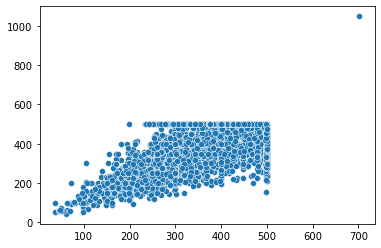

In [34]:
sns.scatterplot(x,y)

In [35]:
# decide on a shape to use it in your model as input shape. you can either use average shape size or try something different. 128*128 is preferred here
image_shape = (128,128,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
help(ImageDataGenerator)

NameError: name 'ImageDataGenerator' is not defined

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [31]:
#use ImageDataGenerator to manipulate the images

In [32]:
image_gen = 

SyntaxError: invalid syntax (436818220.py, line 1)

In [ ]:
#show transfromed version of dog image

### Generating many manipulated images from a directory


flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg

...class_b/

......b_image_1.jpg

......b_image_2.jpg

[bağlantı metni](https://drive.google.com/file/d/1ntiw1WnsWq5en96zRQmWADFxoCKS4DNc/view?usp=sharing)

image_gen.flow_from_directory(train_path)

In [ ]:
image_gen.flow_from_directory(val_path)

# Creating the Model

In [ ]:
#create your CNN model here

## Early Stopping

In [ ]:
early_stop = 

In [ ]:
batch_size = 

In [ ]:
#use image_gen from above and read iamges from train and test set

In [ ]:
train_image_gen = 

In [ ]:
val_image_gen = 

In [ ]:
#show class indices in train set

## Model Training

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = #fit your model using train and validation set

# Evaluating the Model

In [ ]:
losses = pd.DataFrame(......)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
pred_probabilities = 

In [ ]:
pred_probabilities

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Predicting on an Image

In [ ]:
from PIL import Image

In [ ]:
#read 2749.jpg from test set

In [ ]:
# resize it as 128 * 128

In [ ]:
# turn the image into numpy array

In [ ]:
#reshape it as below

In [ ]:
#predict the image class with your model

In [ ]:
train_image_gen.class_indices

In [ ]:
test_image_gen.class_indices